<a href="https://colab.research.google.com/github/Pulsar-kkaturi/DL-Education/blob/master/notebooks/CNN_EfficientNet_Build.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EfficientNet BUILD

# 1. LIbrary Import

In [1]:
import os
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator
import pandas as pd
import csv
import shutil
import json
from sklearn import metrics as skmet
from skimage import morphology
from skimage import measure
from skimage import exposure

### Tensorflow 2.0 ###
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import Input
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras import metrics
from tensorflow.keras import regularizers
from tensorflow.keras import utils
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras import backend as K

# 2. Module Fuction

In [ ]:
model = tf.keras.applications.efficientnet.EfficientNetB0(
    include_top=True, weights='imagenet', input_tensor=None,
    input_shape=None, pooling=None, classes=1000,
    classifier_activation='softmax')
model.summary()

21848064/21834768 [==============================] - 1s 0us/step
Model: "efficientnetb0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling_1 (Rescaling)         (None, 224, 224, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
normalization_1 (Normalization) (None, 224, 224, 3)  7           rescaling_1[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization_1[0][0]            
____________________

# 3. Dataset

In [2]:
(x_train, y_train), (x_test, y_test)=keras.datasets.mnist.load_data(path='minist.npz')

In [ ]:
x_train_list = []
x_test_list = []
for i, i_ in enumerate(x_train[:5000]):
    arr = np.zeros(shape=(32, 32))
    arr[:28,:28] = x_train[i]
    x_train_list.append(arr)
for i, i_ in enumerate(x_test[:500]):
    arr = np.zeros(shape=(32, 32))
    arr[:28,:28] = x_test[i]
    x_test_list.append(arr)

x_train1 = np.expand_dims(np.array(x_train_list), axis=-1)
x_test1 = np.expand_dims(np.array(x_test_list), axis=-1)
print(x_train1.shape, x_test1.shape)

(5000, 32, 32, 1) (500, 32, 32, 1)


In [ ]:
y_train_list = []
y_test_list = []
for i, i_ in enumerate(y_train[:5000]):
    zero = [0]*10
    zero[i_] = 1
    y_train_list.append(zero)

for i, i_ in enumerate(y_test[:500]):
    zero = [0]*10
    zero[i_] = 1
    y_test_list.append(zero)    
    
y_train1 = np.array(y_train_list)
y_test1 = np.array(y_test_list)
print(y_train1.shape, y_test1.shape)

(5000, 10) (500, 10)


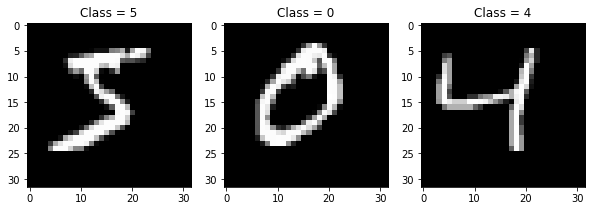

In [ ]:
plt.figure(figsize=(10,10))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(x_train1[i][...,0], cmap='gray')
    plt.title('Class = {}'.format(y_train[i]))

# 4. Model Build

In [ ]:
model = tf.keras.applications.efficientnet.EfficientNetB0(
    include_top=True, weights=None, input_tensor=None,
    input_shape=(32,32,1), pooling=None, classes=10,
    classifier_activation='softmax')
model.summary()


Model: "efficientnetb0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 32, 32, 1)]  0                                            
__________________________________________________________________________________________________
rescaling_2 (Rescaling)         (None, 32, 32, 1)    0           input_3[0][0]                    
__________________________________________________________________________________________________
normalization_2 (Normalization) (None, 32, 32, 1)    3           rescaling_2[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 33, 33, 1)    0           normalization_2[0][0]            
_____________________________________________________________________________________

# 5. Model Training

In [ ]:
model.compile(loss=losses.CategoricalCrossentropy(), optimizer=optimizers.Adam(lr=1e-5), metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
callback_list = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=20),
                         keras.callbacks.ModelCheckpoint(filepath=os.path.join('2d_model.h5'),
                                                         monitor='val_accuracy', save_best_only=True),
                         keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10)]

history = model.fit(x_train1, y_train1, epochs=50, batch_size=32, 
                    validation_data=(x_test1, y_test1),
                    callbacks=callback_list, shuffle=True)

Epoch 1/50
157/157 [==============================] - 61s 335ms/step - loss: 6.4500 - acc: 0.1182 - val_loss: 2.3569 - val_acc: 0.1080
Epoch 2/50
157/157 [==============================] - 51s 327ms/step - loss: 5.9181 - acc: 0.1352 - val_loss: 2.5434 - val_acc: 0.1340
Epoch 3/50
157/157 [==============================] - 51s 328ms/step - loss: 5.5802 - acc: 0.1534 - val_loss: 2.8748 - val_acc: 0.1340
Epoch 4/50
157/157 [==============================] - 51s 328ms/step - loss: 5.2578 - acc: 0.1650 - val_loss: 2.9021 - val_acc: 0.1420
Epoch 5/50
157/157 [==============================] - 51s 328ms/step - loss: 5.0791 - acc: 0.1654 - val_loss: 3.0812 - val_acc: 0.1700
Epoch 6/50
157/157 [==============================] - 52s 329ms/step - loss: 4.8638 - acc: 0.1754 - val_loss: 4.0470 - val_acc: 0.1880
Epoch 7/50
157/157 [==============================] - 51s 328ms/step - loss: 4.7470 - acc: 0.1700 - val_loss: 4.8614 - val_acc: 0.1920
Epoch 8/50
157/157 [==============================] - 5

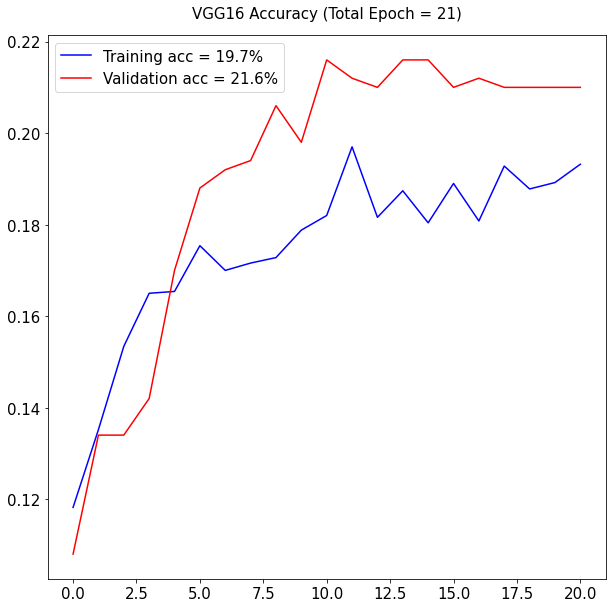

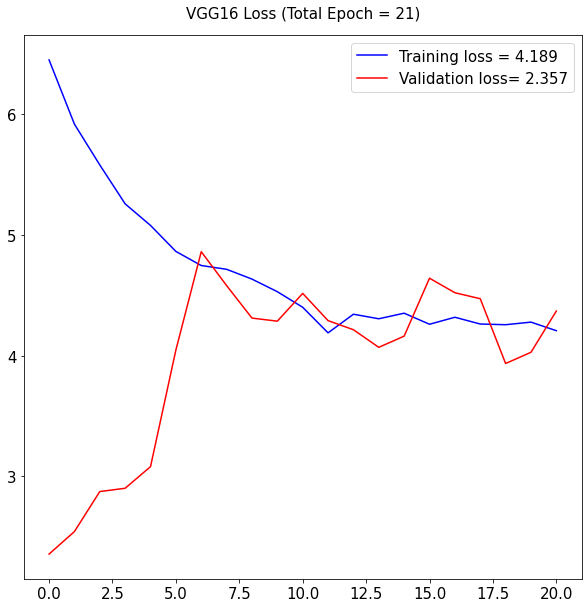

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
# Accuracy graph
plt.figure(figsize=(10, 10))
plt.plot(epochs, acc, 'b', label='Training acc = {}%'.format(np.around(np.max(acc) * 100, decimals=1)))
plt.plot(epochs, val_acc, 'r', label='Validation acc = {}%'.format(np.around(np.max(val_acc) * 100, decimals=1)))
plt.title('{} Accuracy (Total Epoch = {})'.format('VGG16', len(acc)), fontsize=15, y=1.02)
plt.xticks(size=15)
plt.yticks(size=15)
plt.legend(fontsize=15)
plt.show()
# Loss graph
plt.figure(figsize=(10, 10))
plt.plot(epochs, loss, 'b', label='Training loss = {}'.format(np.around(np.min(loss), decimals=3)))
plt.plot(epochs, val_loss, 'r', label='Validation loss= {}'.format(np.around(np.min(val_loss), decimals=3)))
plt.title('{} Loss (Total Epoch = {})'.format('VGG16', len(loss)), fontsize=15, y=1.02)
plt.xticks(size=15)
plt.yticks(size=15)
plt.legend(fontsize=15)
plt.show()